In [1]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

## Loading the Data

In [2]:
PATH = 'uber_rides_data.xlsx'
df = pd.read_excel(PATH)
df.head()

,ride_id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [3]:
# Shape
df.shape

(200000, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ride_id            200000 non-null  int64  
 1   fare_amount        200000 non-null  float64
 2   pickup_datetime    200000 non-null  object 
 3   pickup_longitude   200000 non-null  float64
 4   pickup_latitude    200000 non-null  float64
 5   dropoff_longitude  199999 non-null  float64
 6   dropoff_latitude   199999 non-null  float64
 7   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 12.2+ MB


In [5]:
# Checking Missing Values
df.isnull().sum()

ride_id              0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [6]:
pd.to_datetime(df['pickup_datetime'])

0        2015-05-07 19:52:06+00:00
1        2009-07-17 20:04:56+00:00
2        2009-08-24 21:45:00+00:00
3        2009-06-26 08:22:21+00:00
4        2014-08-28 17:47:00+00:00
                    ...           
199995   2012-10-28 10:49:00+00:00
199996   2014-03-14 01:09:00+00:00
199997   2009-06-29 00:42:00+00:00
199998   2015-05-20 14:56:25+00:00
199999   2010-05-15 04:08:00+00:00
Name: pickup_datetime, Length: 200000, dtype: datetime64[ns, UTC]

In [7]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   ride_id            200000 non-null  int64              
 1   fare_amount        200000 non-null  float64            
 2   pickup_datetime    200000 non-null  datetime64[ns, UTC]
 3   pickup_longitude   200000 non-null  float64            
 4   pickup_latitude    200000 non-null  float64            
 5   dropoff_longitude  199999 non-null  float64            
 6   dropoff_latitude   199999 non-null  float64            
 7   passenger_count    200000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(2)
memory usage: 12.2 MB


In [9]:
df.dropna(inplace=True)

In [10]:
df.shape

(199999, 8)

In [11]:
df.describe()

,ride_id,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.999990e+05,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,2.771248e+07,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543
std,1.601386e+07,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382534e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774524e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155535e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [12]:
import math
def haversine_distance(row):
    lat1, lon1 = row['pickup_latitude'], row['pickup_longitude']
    lat2, lon2 = row['dropoff_latitude'], row['dropoff_longitude']

    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    R = 6371  # Radius of the Earth in kilometers

    return R * c

# Calculate Haversine distance and add it as a new column
df['haversine_distance'] = df.apply(haversine_distance, axis=1)

In [13]:
df.head()

,ride_id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,haversine_distance
0,24238194,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683323
1,27835199,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457590
2,44984355,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036377
3,25894730,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661683
4,17610152,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.475450


In [14]:
df.describe()

,ride_id,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,haversine_distance
count,1.999990e+05,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,2.771248e+07,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543,20.855350
std,1.601386e+07,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995,382.964642
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000,0.000000
25%,1.382534e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000,1.215222
50%,2.774524e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000,2.120992
75%,4.155535e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000,3.875169
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000,16409.239135


**Note:** from using describe() we can visuailize the Statistical measures of each feature.

#### Q) How many rides have 0.0 haversine distance between pickup and dropoff location according to the given dataset?

In [15]:
temp_df = df[df['haversine_distance'] == 0.0]
print('Count_zero_distance_rides :',len(temp_df))

Count_zero_distance_rides : 5632


#### Q) What is the mean 'fare_amount' for rides with 0 haversine distance? 

In [16]:
temp_df = df[df['haversine_distance'] == 0.0]
mean_zero_distance_rides = temp_df['fare_amount'].mean()
print('Mean_zero_distance_rides :',mean_zero_distance_rides)

Mean_zero_distance_rides : 11.585317826704546


In [17]:
df['pickup_year'] = df['pickup_datetime'].dt.year

In [18]:
df.head()

,ride_id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,haversine_distance,pickup_year
0,24238194,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,2015
1,27835199,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,2009
2,44984355,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,2009
3,25894730,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,2009
4,17610152,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.475450,2014


#### Q) What is the maximum 'fare_amount' for a ride?

In [19]:
maximum_fare_amount = df['fare_amount'].max()

print("Maximum 'fare_amount' for a ride:", maximum_fare_amount)

Maximum 'fare_amount' for a ride: 499.0


#### Q) How many rides were recorded in the year 2014?

In [20]:
df['pickup_year'].value_counts()

pickup_year
2012    32396
2011    31945
2013    31194
2009    30536
2010    30194
2014    29968
2015    13766
Name: count, dtype: int64

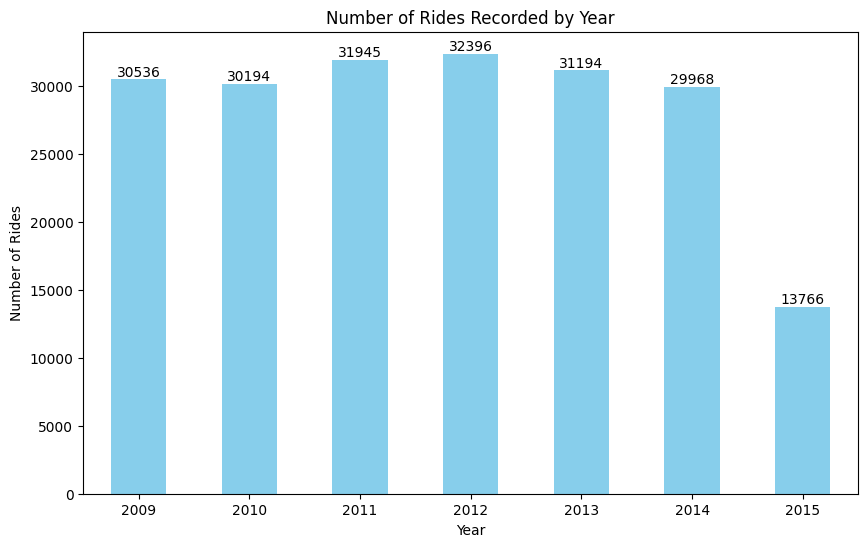

In [21]:
ride_counts = df['pickup_year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
ax = ride_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Rides')
plt.title('Number of Rides Recorded by Year')
plt.xticks(rotation=0)
# Add count labels on top of each bar
for i, v in enumerate(ride_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')
plt.show()

#### Q) What is the haversine distance between pickup and dropoff location for the costliest ride?

In [22]:
costliest_ride = df[df['fare_amount'] == df['fare_amount'].max()]
costliest_ride_distance = costliest_ride['haversine_distance'].values[0]
print(costliest_ride_distance)

0.0007899213191009994


#### Q) How many rides were recorded in the first quarter of 2014?

In [23]:
q1_2014_rides = df[(df['pickup_year'] == 2014) & (df['pickup_datetime'].dt.quarter == 1)]

count_q1_2014_rides = len(q1_2014_rides)
print('Count_q1_2014_rides :',count_q1_2014_rides)

Count_q1_2014_rides : 7687


#### Q) On which day of the week in September 2010, maximum rides were recorded ?

In [24]:
df['week_day'] = df['pickup_datetime'].dt.day_name()
df['pickup_month'] = df['pickup_datetime'].dt.month

In [25]:
sept_2010_rides = df[(df['pickup_year'] == 2010) & (df['pickup_month'] == 9)]
counts_of_week_days = sept_2010_rides['week_day'].value_counts()
print(counts_of_week_days)

week_day
Thursday     457
Wednesday    391
Saturday     362
Friday       354
Sunday       331
Tuesday      322
Monday       265
Name: count, dtype: int64


### Apply a Machine Learning Algorithm to predict the fare amount given following input features:
passenger_count, distance and ride_week_day.

In [26]:
df.head()

,ride_id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,haversine_distance,pickup_year,week_day,pickup_month
0,24238194,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,2015,Thursday,5
1,27835199,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,2009,Friday,7
2,44984355,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,2009,Monday,8
3,25894730,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,2009,Friday,6
4,17610152,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.475450,2014,Thursday,8


In [27]:
# Identifying Input and Output Variables
y = df['fare_amount']

X = df[['passenger_count', 'haversine_distance', 'week_day']]

In [28]:
# Train data and Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [29]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(139999, 3) (139999,)
(60000, 3) (60000,)


In [30]:
# Separating the Categorical and Numerical Columns from X_rain data
X_train.dtypes

passenger_count         int64
haversine_distance    float64
week_day               object
dtype: object

In [31]:
X_train_categorical = X_train.select_dtypes(include=['object'])
X_train_categorical.head()

,week_day
195896,Saturday
47114,Tuesday
144876,Thursday
184791,Sunday
123270,Tuesday


In [32]:
X_train_numerical = X_train.select_dtypes(include=['float64','int64'])
X_train_numerical.head()

,passenger_count,haversine_distance
195896,3,2.034021
47114,2,3.987687
144876,2,1.313580
184791,2,0.780877
123270,1,0.805125


#### Scalling the Numerical Features by Standardization

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# After the scalling column names will be lost 
X_train_numerical_rescaled = pd.DataFrame(scaler.fit_transform(X_train_numerical),
                                         columns= X_train_numerical.columns,
                                         index = X_train_numerical.index)
X_train_numerical_rescaled.head()

,passenger_count,haversine_distance
195896,1.008439,-0.049696
47114,0.242972,-0.044699
144876,0.242972,-0.051539
184791,0.242972,-0.052902
123270,-0.522495,-0.052840


In [34]:
X_train_categorical_LabelEnc = pd.DataFrame(index=X_train_categorical.index)

X_train_categorical_LabelEnc.head()

""
195896
47114
144876
184791
123270


In [35]:
X_train_categorical.week_day.unique()

array(['Saturday', 'Tuesday', 'Thursday', 'Sunday', 'Monday', 'Friday',
       'Wednesday'], dtype=object)

In [36]:
day_encoder = {'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7 }

X_train_categorical_LabelEnc['week_day'] = X_train_categorical['week_day'].apply(lambda x: day_encoder[x])

X_train_categorical_LabelEnc.head()

,week_day
195896,6
47114,2
144876,4
184791,7
123270,2


In [37]:
# Concatinating the Encoded Categorical Features and Rescaled Numerical Features
X_train_transformed = pd.concat([X_train_numerical_rescaled, X_train_categorical_LabelEnc], axis=1)

X_train_transformed.head()

,passenger_count,haversine_distance,week_day
195896,1.008439,-0.049696,6
47114,0.242972,-0.044699,2
144876,0.242972,-0.051539,4
184791,0.242972,-0.052902,7
123270,-0.522495,-0.052840,2


#### Data Preparation Of Test data¶

In [38]:
X_test_categorical = X_test.select_dtypes(include=['object'])

X_test_categorical.head()

,week_day
180481,Sunday
8971,Sunday
77027,Saturday
21656,Thursday
58303,Tuesday


In [39]:
X_test_numerical = X_test.select_dtypes(include=['int64', 'float64'])

X_test_numerical.head()

,passenger_count,haversine_distance
180481,1,0.996834
8971,1,2.537148
77027,5,3.716854
21656,3,4.264505
58303,1,3.235923


In [40]:
X_test_numerical_rescaled = pd.DataFrame(scaler.transform(X_test_numerical),
                                        columns= X_test_numerical.columns,
                                        index = X_test_numerical.index)

X_test_numerical_rescaled.head()

,passenger_count,haversine_distance
180481,-0.522495,-0.052349
8971,-0.522495,-0.048410
77027,2.539373,-0.045392
21656,1.008439,-0.043991
58303,-0.522495,-0.046622


In [41]:
X_test_categorical_LabelEnc= pd.DataFrame(index = X_test_categorical.index)

X_test_categorical_LabelEnc.head()

""
180481
8971
77027
21656
58303


In [42]:
X_test_categorical_LabelEnc['week_day'] = X_test_categorical['week_day'].apply(lambda x : day_encoder[x])
X_test_categorical_LabelEnc.head()

,week_day
180481,7
8971,7
77027,6
21656,4
58303,2


In [43]:
X_test_transformed = pd.concat([X_test_numerical_rescaled, X_test_categorical_LabelEnc], axis=1)

X_test_transformed.head()

,passenger_count,haversine_distance,week_day
180481,-0.522495,-0.052349,7
8971,-0.522495,-0.048410,7
77027,2.539373,-0.045392,6
21656,1.008439,-0.043991,4
58303,-0.522495,-0.046622,2


#### Building the Model and Prediction

In [44]:
from sklearn.linear_model import LinearRegression
lr_reg = LinearRegression()

lr_reg.fit(X_train_transformed,y_train)

LinearRegression()

In [45]:
y_test_predicted = lr_reg.predict(X_test_transformed)

In [46]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_predicted})

temp_df.head()

,Actual,Predicted
180481,4.5,11.346313
8971,15.0,11.347314
77027,12.1,11.658653
21656,14.1,11.443661
58303,10.9,11.227645


#### Evaluation

In [47]:
from sklearn import metrics
r2 = metrics.r2_score(y_test, y_test_predicted)
n = len(y_test)
k = X_test.shape[1]

r2_adj = 1 - (1-r2)*(n-1)/(n-k-1)

print(r2_adj)

0.0005416156910350578


### Random_Forest

In [48]:
from sklearn.ensemble import RandomForestRegressor
RF_reg = RandomForestRegressor()
RF_reg.fit(X_train_transformed, y_train)

RandomForestRegressor()

In [49]:
y_test_predicted = RF_reg.predict(X_test_transformed)

In [50]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_predicted})

temp_df.head()

,Actual,Predicted
180481,4.5,4.614
8971,15.0,8.550
77027,12.1,11.280
21656,14.1,16.459
58303,10.9,12.152


#### Evaluation

In [51]:
from sklearn import metrics
r2 = metrics.r2_score(y_test, y_test_predicted)
n = len(y_test)
k = X_test.shape[1]

r2_adj = 1 - (1-r2)*(n-1)/(n-k-1)

print(r2_adj)

0.6432778022321051
